In [49]:
import pandas as pd
import numpy as np
pd.set_option("display.show_dimensions", False)
pd.set_option("display.float_format", "{:4.2g}".format)

# Pandas-方便的数据分析库

In [50]:
import pandas as pd
pd.__version__

'0.16.2'

## Pandas中的数据对象

### `Series`对象

In [51]:
s = pd.Series([1, 2, 3, 4, 5], index=["a", "b", "c", "d", "e"])
print(("　索引:", s.index))
print(("值数组:", s.values))

　索引: Index([u'a', u'b', u'c', u'd', u'e'], dtype='object')
值数组: [1 2 3 4 5]


In [52]:
print(("位置下标   s[2]:", s[2]))
print(("标签下标 s['d']:", s['d']))

位置下标   s[2]: 3
标签下标 s['d']: 4


In [53]:
%C 5 s[1:3]; s['b':'d']

   s[1:3]         s['b':'d'] 
------------     ------------
b    2           b    2      
c    3           c    3      
dtype: int64     d    4      
                 dtype: int64


In [54]:
%C 5 s[[1,3,2]]; s[['b','d','c']]

 s[[1,3,2]]      s[['b','d','c']]
------------     ----------------
b    2           b    2          
d    4           d    4          
c    3           c    3          
dtype: int64     dtype: int64    


In [55]:
list(s.items())

[('a', 1), ('b', 2), ('c', 3), ('d', 4), ('e', 5)]

In [56]:
s2 = pd.Series([20,30,40,50,60], index=["b","c","d","e","f"])
%C 5 s; s2; s+s2

     s                s2               s+s2     
------------     ------------     --------------
a    1           b    20          a    nan      
b    2           c    30          b     22      
c    3           d    40          c     33      
d    4           e    50          d     44      
e    5           f    60          e     55      
dtype: int64     dtype: int64     f    nan      
                                  dtype: float64


### `DataFrame`对象

#### `DataFrame`的各个组成元素

In [57]:
df_soil = pd.read_csv("data/Soils-simple.csv", index_col=[0, 1], parse_dates=["Date"])
df_soil.columns.name = "Measures"

In [58]:
df_soil.dtypes

Measures
pH               float64
Dens             float64
Ca               float64
Conduc           float64
Date      datetime64[ns]
Name              object
dtype: object

In [59]:
df_soil.shape

(6, 6)

In [60]:
print((df_soil.columns))
print((df_soil.columns.name))

Index([u'pH', u'Dens', u'Ca', u'Conduc', u'Date', u'Name'], dtype='object', name=u'Measures')
Measures


In [61]:
print((df_soil.index))
print((df_soil.index.names))

MultiIndex(levels=[[u'0-10', u'10-30'], [u'Depression', u'Slope', u'Top']],
           labels=[[0, 0, 0, 1, 1, 1], [0, 1, 2, 0, 1, 2]],
           names=[u'Depth', u'Contour'])
[u'Depth', u'Contour']


In [62]:
%C 10 df_soil["pH"]; df_soil[["Dens", "Ca"]]

     df_soil["pH"]                  df_soil[["Dens", "Ca"]]  
------------------------          ---------------------------
Depth  Contour                    Measures          Dens   Ca
0-10   Depression    5.4          Depth Contour              
       Slope         5.5          0-10  Depression  0.98   11
       Top           5.3                Slope        1.1   12
10-30  Depression    4.9                Top            1   13
       Slope         5.3          10-30 Depression   1.4  7.5
       Top           4.8                Slope        1.3  9.5
Name: pH, dtype: float64                Top          1.3   10


In [63]:
%C df_soil.loc["0-10", "Top"]; df_soil.loc["10-30"]

   df_soil.loc["0-10", "Top"]                     df_soil.loc["10-30"]                
--------------------------------  ----------------------------------------------------
Measures                          Measures     pH  Dens   Ca  Conduc       Date   Name
pH                        5.3     Contour                                             
Dens                        1     Depression  4.9   1.4  7.5     5.5 2015-03-21   Lois
Ca                         13     Slope       5.3   1.3  9.5     4.9 2015-02-06  Diana
Conduc                    1.4     Top         4.8   1.3   10     3.6 2015-04-11  Diana
Date      2015-05-21 00:00:00                                                         
Name                      Roy                                                         
Name: (0-10, Top), dtype: object                                                      


In [65]:
df_soil.values.dtype

dtype('O')

#### 将内存中的数据转换为`DataFrame`对象

In [66]:
df1 = pd.DataFrame(np.random.randint(0, 10, (4, 2)), #❶
                   index=["A", "B", "C", "D"], 
                   columns=["a", "b"])

df2 = pd.DataFrame({"a":[1, 2, 3, 4], "b":[5, 6, 7, 8]},  #❷
                   index=["A", "B", "C", "D"])

arr = np.array([("item1", 1), ("item2", 2), ("item3", 3), ("item4", 4)], 
               dtype=[("name", "10S"), ("count", int)])

df3 = pd.DataFrame(arr) #❸

%C 6 df1; df2; df3

  df1          df2              df3      
-------      -------      ---------------
   a  b         a  b          name  count
A  2  6      A  1  5      0  item1      1
B  3  1      B  2  6      1  item2      2
C  5  9      C  3  7      2  item3      3
D  8  0      D  4  8      3  item4      4


In [67]:
dict1 = {"a":[1, 2, 3], "b":[4, 5, 6]}
dict2 = {"a":{"A":1, "B":2}, "b":{"A":3, "C":4}}
df1 = pd.DataFrame.from_dict(dict1, orient="index")
df2 = pd.DataFrame.from_dict(dict1, orient="columns")
df3 = pd.DataFrame.from_dict(dict2, orient="index")
df4 = pd.DataFrame.from_dict(dict2, orient="columns")

%C 6 df1; df2; df3; df4

   df1            df2             df3                df4    
----------      -------      --------------      -----------
   0  1  2         a  b         A    B    C           a    b
a  1  2  3      0  1  4      a  1    2  nan      A    1    3
b  4  5  6      1  2  5      b  3  nan    4      B    2  nan
                2  3  6                          C  nan    4


In [69]:
items = dict1.items()
df1 = pd.DataFrame.from_items(items, orient="index", columns=["A", "B", "C"])
df2 = pd.DataFrame.from_items(items, orient="columns")

%C 6 df1; df2

   df1            df2  
----------      -------
   A  B  C         a  b
a  1  2  3      0  1  4
b  4  5  6      1  2  5
                2  3  6


#### 将`DataFrame`对象转换为其它格式的数据

In [70]:
print((df2.to_dict(orient="records"))) #字典列表
print((df2.to_dict(orient="list"))) #列表字典
print((df2.to_dict(orient="dict"))) #嵌套字典

[{'a': 1, 'b': 4}, {'a': 2, 'b': 5}, {'a': 3, 'b': 6}]
{'a': [1, 2, 3], 'b': [4, 5, 6]}
{'a': {0: 1, 1: 2, 2: 3}, 'b': {0: 4, 1: 5, 2: 6}}


In [71]:
print((df2.to_records().dtype))
print((df2.to_records(index=False).dtype))

[('index', '<i8'), ('a', '<i8'), ('b', '<i8')]
[('a', '<i8'), ('b', '<i8')]


### `Index`对象

In [73]:
index = df_soil.columns
index.values

array(['pH', 'Dens', 'Ca', 'Conduc', 'Date', 'Name'], dtype=object)

In [74]:
print((index[[1, 3]]))
print((index[index > 'c']))
print((index[1::2]))

Index([u'Dens', u'Conduc'], dtype='object', name=u'Measures')
Index([u'pH'], dtype='object', name=u'Measures')
Index([u'Dens', u'Conduc', u'Name'], dtype='object', name=u'Measures')


In [75]:
print((index.get_loc('Ca')))
print((index.get_indexer(['Dens', 'Conduc', 'nothing'])))

2
[ 1  3 -1]


In [76]:
index = pd.Index(["A", "B", "C", "D", "E"], name="level")
s1 = pd.Series([1, 2, 3, 4, 5], index=index)
df1 = pd.DataFrame({"a":[1, 2, 3, 4, 5], "b":[6, 7, 8, 9, 10]}, index=index)
print((s1.index is df1.index))

True


### `MultiIndex`对象

In [78]:
mindex = df_soil.index
print((mindex[1]))
print((mindex.get_loc(("0-10", "Slope"))))
print((mindex.get_indexer([("10-30", "Top"), ("0-10", "Depression"), "nothing"])))

('0-10', 'Slope')
1
[ 5  0 -1]


In [79]:
print((mindex.levels[0]))
print((mindex.levels[1]))

Index([u'0-10', u'10-30'], dtype='object', name=u'Depth')
Index([u'Depression', u'Slope', u'Top'], dtype='object', name=u'Contour')


In [80]:
print((mindex.labels[0]))
print((mindex.labels[1]))

FrozenNDArray([0, 0, 0, 1, 1, 1], dtype='int8')
FrozenNDArray([0, 1, 2, 0, 1, 2], dtype='int8')


In [81]:
level0, level1 = mindex.levels
label0, label1 = mindex.labels
list(zip(level0[label0], level1[label1]))

[('0-10', 'Depression'),
 ('0-10', 'Slope'),
 ('0-10', 'Top'),
 ('10-30', 'Depression'),
 ('10-30', 'Slope'),
 ('10-30', 'Top')]

In [82]:
pd.Index([("A", "x"), ("A", "y"), ("B", "x"), ("B", "y")], name=["class1", "class2"])

MultiIndex(levels=[[u'A', u'B'], [u'x', u'y']],
           labels=[[0, 0, 1, 1], [0, 1, 0, 1]],
           names=[u'class1', u'class2'])

In [83]:
class1 = ["A", "A", "B", "B"]
class2 = ["x", "y", "x", "y"]
pd.MultiIndex.from_arrays([class1, class2], names=["class1", "class2"])

MultiIndex(levels=[[u'A', u'B'], [u'x', u'y']],
           labels=[[0, 0, 1, 1], [0, 1, 0, 1]],
           names=[u'class1', u'class2'])

In [84]:
midx = pd.MultiIndex.from_product([["A", "B", "C"], ["x", "y"]], 
                           names=["class1", "class2"])
df1 = pd.DataFrame(np.random.randint(0, 10, (6, 6)), columns=midx, index=midx)
%C df1

              df1              
-------------------------------
class1         A     B     C   
class2         x  y  x  y  x  y
class1 class2                  
A      x       3  0  8  2  7  3
       y       9  7  6  9  2  4
B      x       8  8  0  4  8  3
       y       8  3  7  6  3  9
C      x       2  0  4  0  6  4
       y       0  7  5  6  0  5


### 常用的函数参数

In [85]:
%C df_soil.mean(); df_soil.mean(axis=1); df_soil.mean(level=1)

df_soil.mean()    df_soil.mean(axis=1)          df_soil.mean(level=1)       
--------------  ------------------------  ----------------------------------
Measures        Depth  Contour            Measures     pH  Dens   Ca  Conduc
pH        5.2   0-10   Depression    4.6  Contour                           
Dens      1.2          Slope         5.2  Depression  5.1   1.2  9.1     3.5
Ca         11          Top           5.3  Slope       5.4   1.2   11     3.5
Conduc    3.1   10-30  Depression    4.8  Top         5.1   1.2   12     2.5
dtype: float64         Slope         5.3                                    
                       Top             5                                    
                dtype: float64                                              


### `DataFrame`的内部结构

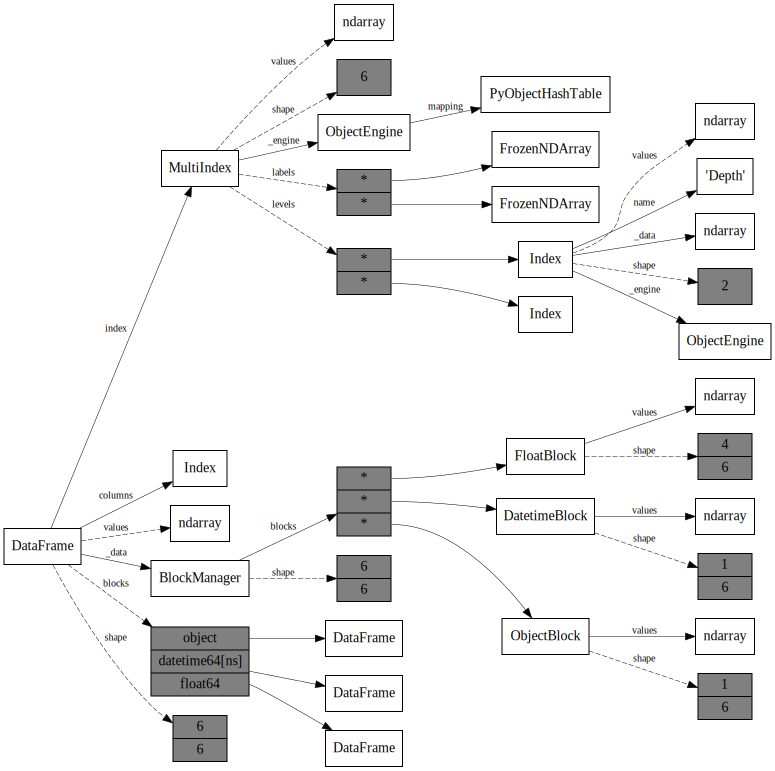

In [91]:
#%fig=DataFrame对象的内部结构
from scpy2.common import GraphvizDataFrame
%dot GraphvizDataFrame.graphviz(df_soil)

In [92]:
df_soil.columns._engine.mapping.get_item("Date")

4

In [93]:
s = df_soil["Dens"]
s.values.base is df_soil._data.blocks[0].values

True

In [94]:
print((df_soil[["Dens"]]._data.blocks[0].values.base))

None


In [98]:
df_float = df_soil[['pH', 'Dens', 'Ca', 'Conduc']]
df_float.values.base is df_float._data.blocks[0].values

True

In [99]:
df_float.loc["0-10", "Top"].values.base is df_float._data.blocks[0].values

True

In [100]:
df_soil.values.dtype

dtype('O')